In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

from os.path import join

filename = "taxi-trips.csv"

df = pd.read_csv(filename)

In [2]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


### Basic Information About Columns

___id:___ a unique identifier for each trip

___vendor id:___ a code indicating the provider associated with the trip record

___pickup datetime:___ date and time when the meter was engaged

___dropoff datetime:___ date and time when the meter was disengaged

___passenger count:___ the number of passengers in the vehicle

___pickup longitude:___ the longitude where the meter was engaged

___pickup latitude:___ the latitude where the meter was engaged

___dropoff longitude:___ the longitude where the meter was disengaged

___store and fwd flag:___ indicates whether the trip record was held in vehicle memory

___trip duration:___ duration of the trip in seconds

In [3]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


### Adding pickup district and dropoff district
Below 2 new columns which names are pickup_district and dropoff_district will be added.

In this columns we can see states where passenger take a taxi(pickup_district) and leave the taxi(dropoff_district).

In [4]:
!pip install reverse_geocoder
!pip install reverse_engineer

In [5]:
import reverse_geocoder as rg
def pickup_location(row): 

    x1=row['pickup_longitude']
    y1=row['pickup_latitude']
    coordinates = (y1,x1 )
    location = rg.search(coordinates, mode=1)
    return location[0]['name']

df['pickup_district'] = df.apply(pickup_location, axis=1)

Loading formatted geocoded file...


In [6]:
def dropoff_location(row): 

    x2=row['dropoff_longitude']
    y2=row['dropoff_latitude']
    coordinates = (y2,x2 )
    location = rg.search(coordinates, mode=1)
    return location[0]['name']

df['dropoff_district'] = df.apply(dropoff_location, axis=1)

In [7]:
df.head()       #New look of the table

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City


In [8]:
top5pickup_places = df.groupby('pickup_district')['pickup_district'].count().nlargest(5)
top5pickup_places.head()
#Top 5 places where passengers take a taxi most.

pickup_district
Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64

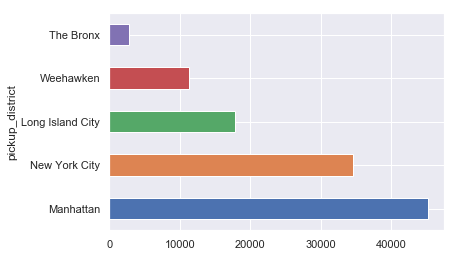

In [9]:
top5pickup_places.plot(kind='barh')

In [10]:
top5dropoff_places = df.groupby('dropoff_district')['dropoff_district'].count()
top5dropoff_places.nlargest(5).head()
#Top 5 places where passengers leave the taxi most.

dropoff_district
Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64

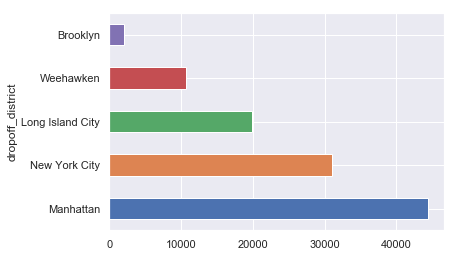

In [11]:
top5dropoff_places.nlargest(5).plot(kind='barh')

### Adding distance
Below new column(distance) will be added.

In this column we can see the distance(in miles) that taxi traveled.

In [12]:
!pip install geopy
from geopy.distance import geodesic

In [13]:
def finding_distance(row):
    x1=row['pickup_longitude']
    y1=row['pickup_latitude']
    newport_ri = (y1, x1)
    x2=row['dropoff_longitude']
    y2=row['dropoff_latitude']
    cleveland_oh = (y2, x2)
    distance = (geodesic(newport_ri, cleveland_oh).miles)
    return distance

df['distance'] = df.apply(finding_distance, axis=1)

df.head()       #New look of the table

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103


### Adding time of the day
Below new column(time_of_the_day) will be added.

In this column the day will divide in to five with respect to time that taxi take a passenger.

In [14]:
def pickup_time(row):
    row = row["pickup_datetime"]
    x = int(row[11:13])
    if x < 7 or x >= 23:
        time = "late_night"
    elif x < 9:
        time = "rush_hour_morning"
    elif x < 16:
        time = "afternoon"
    elif x < 18:
        time = "rush_hour_evening"
    else:
        time = "evening"
    
    return time
    
df['time_of_day'] = df.apply(pickup_time, axis=1)

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon


In [15]:
df.groupby('time_of_day')['distance'].mean()
#This cell shows how the mean of the distance changes as the time of the day changes.

time_of_day
afternoon            1.932456
evening              2.099076
late_night           2.558580
rush_hour_evening    2.077128
rush_hour_morning    1.943823
Name: distance, dtype: float64

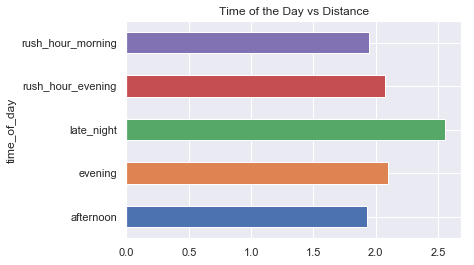

In [16]:
plt.ylabel("Distance(miles)")
plt.title("Time of the Day vs Distance")
df.groupby('time_of_day')['distance'].mean().plot(kind = 'barh')

In [17]:
df.groupby('time_of_day')['trip_duration'].sum()
#This cell shows the total time that spend on the way with respect to time of the day.

time_of_day
afternoon            38317857
evening              31449194
late_night           18645303
rush_hour_evening    11847255
rush_hour_morning     9319905
Name: trip_duration, dtype: int64

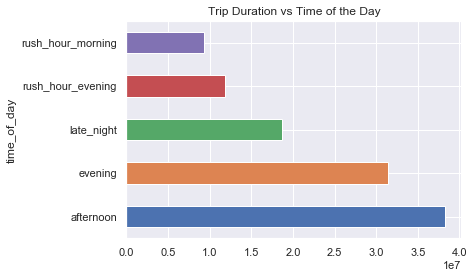

In [18]:
plt.ylabel("Trip Duraion in (m)")
plt.title("Trip Duration vs Time of the Day")
df.groupby('time_of_day')['trip_duration'].sum().plot(kind = 'barh')

In [19]:
df.groupby('time_of_day')['trip_duration'].mean()
#This cell shows the average time that spend on the way with respect to time of the day.

time_of_day
afternoon             963.922746
evening               893.595329
late_night            866.095457
rush_hour_evening    1024.494552
rush_hour_morning     918.488716
Name: trip_duration, dtype: float64

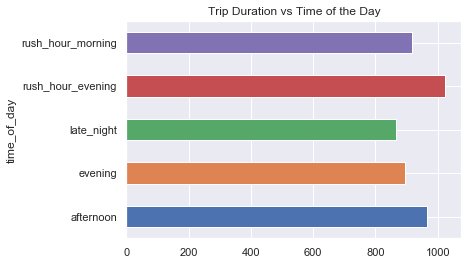

In [20]:
plt.ylabel("Trip Duraion in (m)")
plt.title("Trip Duration vs Time of the Day")
df.groupby('time_of_day')['trip_duration'].mean().plot(kind = 'barh')

### Hypothesis Testing
#### NULL HYPOTHESIS : Passenger group size has no efect on the distance.

In [55]:
trip = "distance"
        
onep = df[df["passenger_count"] == 1][trip]
groupp = df[df["passenger_count"] != 1][trip]
threep = df[df["passenger_count"] == 3][trip]
fourp = df[df["passenger_count"] == 4][trip]
fivep = df[df["passenger_count"] == 5][trip]
sixp = df[df["passenger_count"] == 6][trip]

### Since we have maximum six passengers.

In [57]:
print("mean distance of the taxies which have only one passenger : {:.2f}".format(onep.mean()))
print("mean distance of the taxies which have two passengers : {:.2f}".format(twop.mean()))
print("mean distance of the taxies which have three passengers : {:.2f}".format(threep.mean()))
print("mean distance of the taxies which have four passengers : {:.2f}".format(fourp.mean()))
print("mean distance of the taxies which have five passengers : {:.2f}".format(fivep.mean())) 
print("mean distance of the taxies which have six passengers : {:.2f}".format(sixp.mean()))

mean distance of the taxies which have only one passenger : 2.09
mean distance of the taxies which have two passengers : 2.21
mean distance of the taxies which have three passengers : 2.12
mean distance of the taxies which have four passengers : 2.13
mean distance of the taxies which have five passengers : 2.13
mean distance of the taxies which have six passengers : 2.11


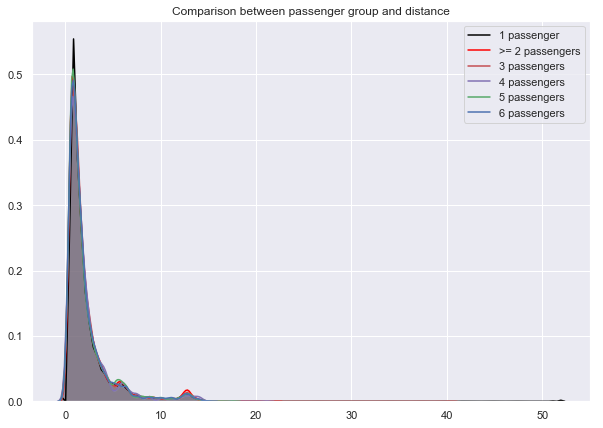

In [60]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

sns.kdeplot(onep, shade=True, label="1 passenger", color="black")
sns.kdeplot(twop, shade=True, label=">= 2 passengers", color="red")
sns.kdeplot(threep, shade=True, label="3 passengers", color="r")
sns.kdeplot(fourp, shade=True, label="4 passengers", color="m")
sns.kdeplot(fivep, shade=True, label="5 passengers", color="g")
sns.kdeplot(sixp, shade=True, label="6 passengers", color="b")

plt.title("Comparison between passenger group and distance")
plt.show()

In [62]:
stats.f_oneway(onep, twop, threep, fourp, fivep, sixp)

F_onewayResult(statistic=7.283096305101685, pvalue=7.86179334693054e-07)

Since the pvalue is smaller than 0.05, we reject the null hypothesis.

#### NULL HYPOTHESIS : Do trip distances increase in weekends?

In [71]:
def Day(row):
    date = row['pickup_datetime'][0:10]
    dayName = pd.to_datetime(date).day_name()
    return dayName

df['Day'] = df.apply(Day, axis=1)

In [72]:
df.head() #in order to see uptades

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day,Days,Day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush_hour_evening,Monday,Monday
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening,Thursday,Thursday
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush_hour_morning,Friday,Friday
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon,Monday,Monday
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon,Monday,Monday


In [73]:
def IsWeekDay(row):
    Day = row['Day']
    if Day == 'Saturday' or Day == 'Sunday':
        return 0
    else:
        return 1
    
df['IsWeekDay'] = df.apply(IsWeekDay, axis=1)

In [74]:
df.head() #in order to see uptades

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day,Days,Day,IsWeekDay
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush_hour_evening,Monday,Monday,1
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening,Thursday,Thursday,1
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush_hour_morning,Friday,Friday,1
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon,Monday,Monday,1
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon,Monday,Monday,1


In [75]:
trip = "distance"
        
weekday = df[df["IsWeekDay"] == 1][trip]
weekend = df[df["IsWeekDay"] == 0][trip]

In [76]:
print("mean distance of the taxies which travels at weekends : {:.2f}".format(weekend.mean()))
print("mean distance of the taxies which travels at weekdays : {:.2f}".format(weekday.mean()))

mean distance of the taxies which travels at weekends : 2.17
mean distance of the taxies which travels at weekdays : 2.09


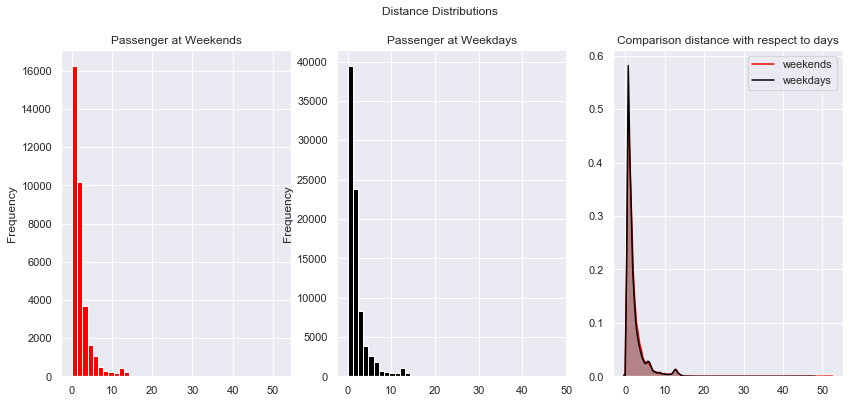

In [80]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))
        
weekend.plot(kind="hist", ax=ax[0], bins=40, label="completed", color="red")
ax[0].set_title("Passenger at Weekends")

weekday.plot(kind="hist", ax=ax[1], bins=40, label="none", color="black")
ax[1].set_title("Passenger at Weekdays")

sns.kdeplot(weekend, shade=True, label="weekends", ax=ax[2], color="red")
sns.kdeplot(weekday, shade=True, label="weekdays", ax=ax[2], color="black")
ax[2].set_title("Comparison distance with respect to days")

plt.suptitle("Distance Distributions")
plt.show()

In [82]:
stats.ttest_ind(weekday, weekend, equal_var=False)

Ttest_indResult(statistic=-5.604877366928616, pvalue=2.0924144330692153e-08)

Since the pvalue is smaller than 0.05, we reject the null hypothesis.